<a href="https://colab.research.google.com/github/BLayus/Statistics/blob/main/DA_Brainnest_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

!pip install pyreadstat

import pyreadstat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import f_oneway
from scipy.stats import boxcox
import scipy.stats

import statsmodels.api as sm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 5.1 MB/s 


In [ ]:
# Open the dataset on google drive mount

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_spss('/content/drive/MyDrive/DA Brainest/Week 4/Dataset/PickUpLines.sav')

Mounted at /content/drive


In [ ]:
# Take a first look at the dataset

display(df.head(5))


,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
0,1.0,Cute-Direct (Experimental Condition),No Spray (Control Condition),3.25424,female,21.0,white or european,sophomore,Yes,Not Selected
1,2.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),4.43760,female,19.0,white or european,junior,No,Selected
2,3.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),4.43760,female,21.0,white or european,freshman,No,Selected
3,4.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),3.91988,female,19.0,white or european,junior,Yes,Not Selected
4,5.0,Direct-Direct (Control Condition),No Spray (Control Condition),3.99384,female,20.0,eastern or asian,sophomore,No,Selected


In [ ]:
df.columns

Index(['ParticipantNumber', 'PickUp', 'Scent', 'Receptivity', 'Gender', 'Age',
       'Ethnicity', 'YearInSchool', 'Contraceptive', 'filter_$'],
      dtype='object')

In [ ]:
#creating new columns with dummy data for pickup, scent, contraceptive and filter_$

dummy_cols = ['PickUp', 'Scent', 'Gender', 'Contraceptive', 'filter_$']

df['PickUp'].replace({'Direct-Direct (Control Condition)': 0, 'Cute-Direct (Experimental Condition)': 1}, inplace=True)

df['Scent'].replace({'No Spray (Control Condition)': 0, 'Spray (Experimental Condition)': 1}, inplace=True)

df['Contraceptive'].replace({'No': 0, 'Yes': 1}, inplace=True)

df['filter_$'].replace({'Not Selected': 0, 'Selected': 1}, inplace=True)

display(df)

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
0,1.0,1,0,3.25424,female,21.0,white or european,sophomore,1,0
1,2.0,1,1,4.43760,female,19.0,white or european,junior,0,1
2,3.0,1,1,4.43760,female,21.0,white or european,freshman,0,1
3,4.0,1,1,3.91988,female,19.0,white or european,junior,1,0
4,5.0,0,0,3.99384,female,20.0,eastern or asian,sophomore,0,1
...,...,...,...,...,...,...,...,...,...,...
189,190.0,1,0,4.06780,female,23.0,white or european,freshman,1,0
190,191.0,1,0,3.99384,female,21.0,"hispanic, latino, spanish",sophomore,1,0
191,192.0,0,1,3.91988,female,20.0,other,junior,1,0
192,193.0,0,1,4.32666,female,20.0,white or european,sophomore,1,0


##Main Research Question: How do pick-up lines and a person’s scent influence relationship initiation?
  * Dataset: “PickUpLines.sav”


### RQ1: Is there any evidence to suggest that the cute-direct pick-up approach will lead to more relationship receptivity than the direct-direct approach?

####What is your dependent variable?

In [ ]:
# The dependent variable is the receptivity value

####What is(are) your independent variable(s)?

In [ ]:
# The independent variable is the pickup approach

Is there independence of observations?

In [ ]:
# Yes, there is independence, since the value of receptivity is collected once a time from each experiment participant

####Are there any significant outliers?

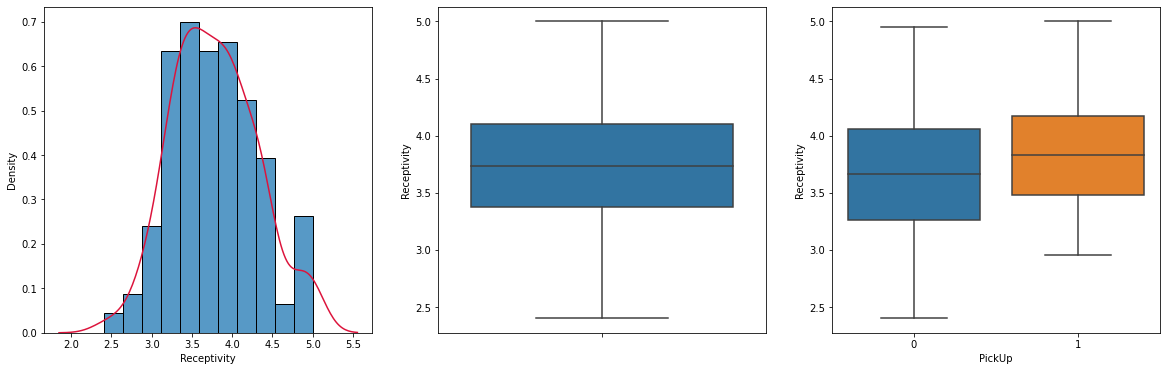

ShapiroResult(statistic=0.9844915270805359, pvalue=0.031009113416075706)

In [ ]:
# Lets plot some charts... and test for normality
# Displot and Boxplot and Shapiro test

fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(df['Receptivity'], kde= False, stat= 'density', ax= ax[0])
sns.kdeplot(df['Receptivity'], ax= ax[0], color= 'crimson')
sns.boxplot(y= 'Receptivity', data= df, ax= ax[1])
sns.boxplot(y= 'Receptivity', x= 'PickUp', data= df, ax= ax[2])
plt.show()

shapiro(df['Receptivity'])

# since the value of Shapiro-Wilk test (0.03) is less than 0.05, we can reject the null hypothesis, so the data are non normally distributed

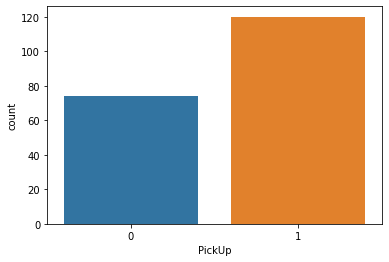

In [ ]:
sns.countplot(x=df['PickUp'])

# There is a slightly inbalance between classes, with aprox 120 participants using Cute-Direct pickup approach (1) and 80 using direct-direct approach

####How is your dependent variable distributed in each cell?

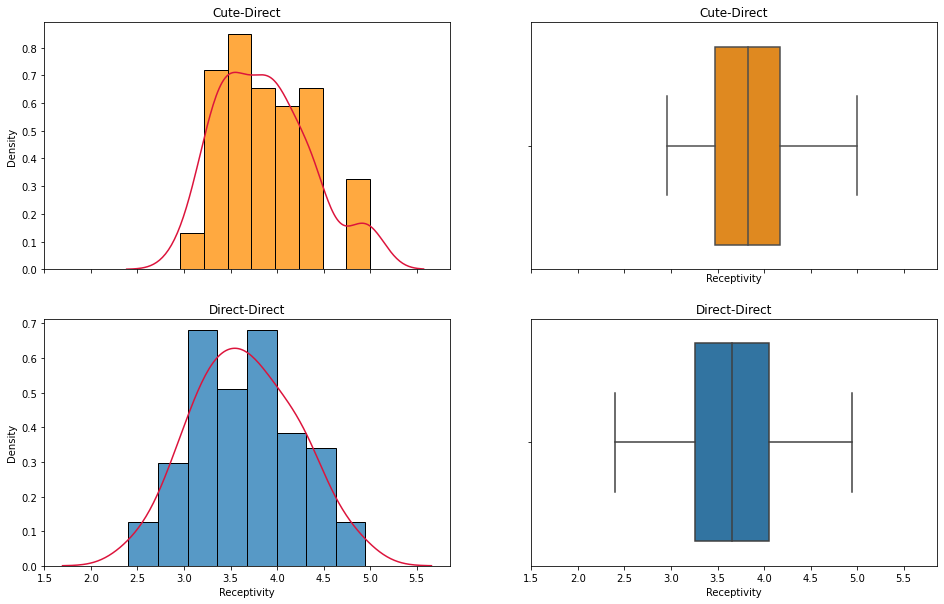

In [ ]:
#Comparing distribution in receptivity values between different approaches

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10), sharex=True)

sns.histplot(df[df['PickUp'] == 1]['Receptivity'], kde= False, stat= 'density', ax= ax1, color= 'darkorange')
sns.kdeplot(df[df['PickUp'] == 1]['Receptivity'], ax= ax1, color= 'crimson')
ax1.set_title('Cute-Direct')
sns.boxplot(x= df[df['PickUp'] == 1]['Receptivity'], ax= ax2, color= 'darkorange')
ax2.set_title('Cute-Direct')

sns.histplot(df[df['PickUp'] == 0]['Receptivity'], kde= False, stat= 'density', ax= ax3)
sns.kdeplot(df[df['PickUp'] == 0]['Receptivity'], ax= ax3, color= 'crimson')
ax3.set_title('Direct-Direct')
sns.boxplot(x= df[df['PickUp'] == 0]['Receptivity'], ax= ax4)
ax4.set_title('Direct-Direct')

plt.show()

In [ ]:
# Test normality of each distribution

CD_pickup = df[df['PickUp'] == 1]['Receptivity']

DD_pickup = df[df['PickUp'] == 0]['Receptivity']

display(shapiro(CD_pickup))
display(shapiro(DD_pickup))

# since the value of Shapiro-Wilk test for the variable Cute-Direct approach (0.0008) is less than the threshold,
# then we can reject the null hypothesis and say that this data are not normally distributed

# since the value of Shapiro-Wilk test for the Direct-Direct approach (0.87) is greater than 0.05,
# we fail to reject the null hypothesis, so the data are normally distributed


ShapiroResult(statistic=0.9578615427017212, pvalue=0.0008551983046345413)

ShapiroResult(statistic=0.9907618761062622, pvalue=0.8713714480400085)

####Do you need to perform any transformations?

In [ ]:
# We will need to perform a transformation, because the data of Cute-Direct pickup approach are non-normally distributed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9798208475112915, pvalue=0.06853971630334854)

ShapiroResult(statistic=0.9916223287582397, pvalue=0.91087806224823)

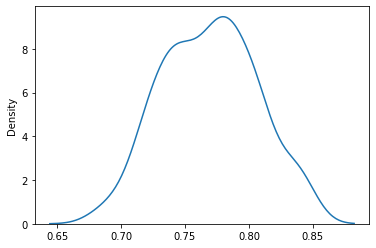

In [ ]:
# applying the box cox transformation and re-test normality

from scipy.stats import boxcox
CD_pickup_transf, CDbest_lambda = stats.boxcox(CD_pickup)
DD_pickup_transf, DDbest_lambda = stats.boxcox(DD_pickup)

#plot the distribution of the transformed data values
sns.distplot(CD_pickup_transf, hist=False, kde=True)

# test of normality
display(shapiro(CD_pickup_transf))
display(shapiro(DD_pickup_transf))


# As the transformed value of cute-direct shapiro test is 0.06, which is more than the threshold, we fail to reject the null hypothesis
# So the data becomes normally distributed after box-cox transformation

####Is there homogeneity or heterogeneity of variance?

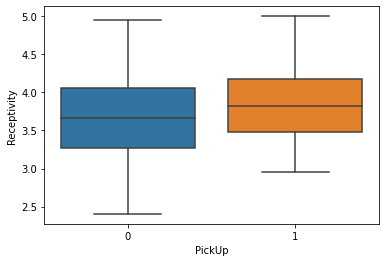

In [ ]:
# Plot a boxplot and confirm variance with algebric method

sns.boxplot(x= df['PickUp'], y = df['Receptivity'])

In [ ]:
# Performing Levene's test for homogeneity of variance between one group (CD_pickup) against the other group (DD_pickup)

display(stats.levene(CD_pickup_transf, DD_pickup_transf, center='mean'))

print(CD_pickup_transf.var())
print(DD_pickup_transf.var())

# Since the P-value of levene's test is 2.77^-30, which is much minor than the threshold, we  reject the null hipothesys,
# so we  have sufficient evidence to say that the variance in receptivity between direct-direct vs cute-direct participants
# is significantly different

# There is heterogeneity of variance

LeveneResult(statistic=188.0379080176696, pvalue=2.7783800283760947e-30)

0.0013289780319032834
0.1369291448060476


In [ ]:
print(CD_pickup.var())
print(DD_pickup.var())


0.24883005508974784
0.31225578242199187


####What is the mean score of receptivity in the experimental condition?

In [ ]:
print(f'The mean score of receptivity in participants in the experimental condition (using Cute-direct pickup) is:{CD_pickup.mean()}')

print(f'The Standard deviation score of receptivity in participants in the experimental condition (using Cute-direct pickup) is:{CD_pickup.std()}')

The mean score of receptivity in participants in the experimental condition (using Cute-direct pickup) is:3.863434
The Standard deviation score of receptivity in participants in the experimental condition (using Cute-direct pickup) is:0.4988286831064828


####What is the mean score of receptivity in the control condition?

In [ ]:
print(f'The mean score of receptivity in participants in the control condition (using Direct-direct pickup) is:{DD_pickup.mean()}')

print(f'The Standard deviation score of receptivity in participants in the control condition (using Direct-direct pickup) is:{DD_pickup.std()}')

The mean score of receptivity in participants in the control condition (using Direct-direct pickup) is:3.6544516216216207
The Standard deviation score of receptivity in participants in the control condition (using Direct-direct pickup) is:0.5587985168394703


####What is your answer to RQ1? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.

In [ ]:
# Performing a non parametric test as the assumptions of normal distribution and homogeneity of variance are not valid in this case

from scipy.stats import mannwhitneyu

Np_stat, p = mannwhitneyu(CD_pickup, DD_pickup)

print(Np_stat, p)
if p > 0.05:
  print('Same distribution (fail to reject H0)')
else:
  print('Different distribution (reject H0)')


5353.0 0.016241422695941032
Different distribution (reject H0)


In [ ]:
from scipy.stats import kruskal

K_stat, p = kruskal(CD_pickup, DD_pickup)

print(K_stat, p)
if p > 0.05:
  print('Same distribution (fail to reject H0)')
else:
  print('Different distribution (reject H0)')

5.782878685405337 0.016183015960661084
Different distribution (reject H0)


In [ ]:
# Performing ANOVA test to analyze differences between these two groups of the experiment

# H0 - Null Hypothesis - There is no difference between group's means
# Ha - Alternative Hypothesis - There is at least one substancial difference between group's means

from scipy.stats import f_oneway

f_oneway(CD_pickup_transf, DD_pickup)

# A one-way ANOVA was conducted to analyze if there was a difference on the receptivity of womem wich was aborded with
# a cute-direct pickup approach compared to girls aborded with direct-direct pickup approach.
# There were no outliers, as seen on boxplot chart and data was assured to be normally distributed as seen on shapiro-wik's test (p>0.05)
# (a box-cox transformation on the Cute-Direct pickup distribution was applied)
# and there was homogeneity of variances, as assessed by Levene's test of homogeneity of variances (p = 0.28).

# Pickup receptivity score was statistically significantly different between  groups, F(1, 194) = 3186.9, p < 0.05.
# So we can conclude that there was at least one sample group's mean that was different.

# Receptivity of direct-direct pickup mean was 3.65 and STD was 0.55, besides Cute-direct pickup mean was 3.86 and STD was 0.49.



F_onewayResult(statistic=3186.9387604203557, pvalue=1.6080504261041496e-121)

###RQ2: Is there any evidence to suggest that the presence of androstadienone spray will lead to more relationship receptivity than no spray?

####What is your dependent variable?

In [ ]:
# The dependent variable is the receptivity value

####What is(are) your independent variable(s)?

In [ ]:
# The independent variable is the spray or not spray androstadienone

####Is there independence of observations?

In [ ]:
# Yes, there is independence, since the value of receptivity is collected once a time from each experiment participant

# Calculating point-biserial correlation (a specific kind of pearson's correlation), since we have one binary (dichotomus) variable and the other is continuous

Scent_corr = stats.pointbiserialr(df.Receptivity, df.Scent)
print(Scent_corr)

# the r-value (0.14) indicates a low correlation, but the p-value 0.03, is less than the threshold, so we reject the null hipothesys
# that means there are significant statistical bivariate correlation between Receptivity and Scent


PointbiserialrResult(correlation=0.1485177970865014, pvalue=0.03876045015663428)


####Are there any significant outliers?

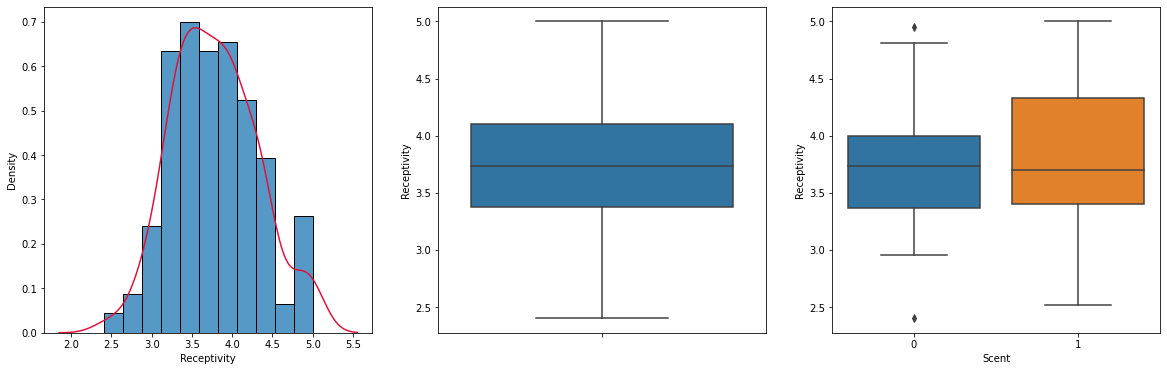

ShapiroResult(statistic=0.9844915270805359, pvalue=0.031009113416075706)

In [ ]:
# Lets plot some charts... and test for normality
# Displot and Boxplot and Shapiro test

fig, ax = plt.subplots(1,3, figsize=(20,6))
sns.histplot(df['Receptivity'], kde= False, stat= 'density', ax= ax[0])
sns.kdeplot(df['Receptivity'], ax= ax[0], color= 'crimson')
sns.boxplot(y= 'Receptivity', data= df, ax= ax[1])
sns.boxplot(y= 'Receptivity', x= 'Scent', data= df, ax= ax[2])
plt.show()

shapiro(df['Receptivity'])

# since the value of Shapiro-Wilk test (0.03) is less than 0.05, we  reject the null hypothesis (data has normal distribution), so the data are non-normally distributed

####How is your dependent variable distributed in each cell?

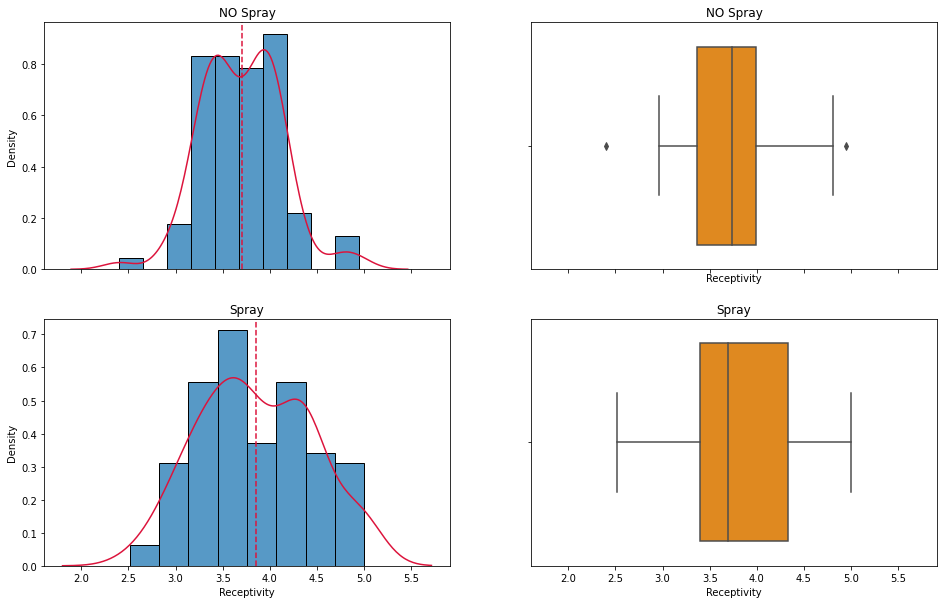

In [ ]:
#Comparing distribution in receptivity values between different groups, with and without feromone spray

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,10), sharex=True)

sns.histplot(df[df['Scent'] == 0]['Receptivity'], kde= False, stat= 'density', ax= ax1)
sns.kdeplot(df[df['Scent'] == 0]['Receptivity'], ax= ax1, color= 'crimson')
ax1.axvline(df[df['Scent'] == 0]['Receptivity'].mean(), ls='--', color='crimson')
ax1.set_title('NO Spray')

sns.boxplot(x= df[df['Scent'] == 0]['Receptivity'], ax= ax2, color= 'darkorange')
ax2.set_title('NO Spray')


sns.histplot(df[df['Scent'] == 1]['Receptivity'], kde= False, stat= 'density', ax= ax3)
sns.kdeplot(df[df['Scent'] == 1]['Receptivity'], ax= ax3, color= 'crimson')
ax3.axvline(df[df['Scent'] == 1]['Receptivity'].mean(), ls='--', color='crimson')
ax3.get_xticklabels(ax1)
ax3.set_title('Spray')

sns.boxplot(x= df[df['Scent'] == 1]['Receptivity'], ax= ax4, color= 'darkorange')
ax4.set_title('Spray')

plt.show()

####Do you need to perform any transformations?

In [ ]:
# Test normality of each distribution

No_Spray = df[df['Scent'] == 0]['Receptivity']

Spray = df[df['Scent'] == 1]['Receptivity']

display(shapiro(No_Spray))
display(shapiro(Spray))

# since the two values of Shapiro-Wilk test (0.03) is less than 0.05, we can not reject the null hypothesis, so the data are nonnormally distributed

ShapiroResult(statistic=0.9701603651046753, pvalue=0.03629191964864731)

ShapiroResult(statistic=0.9737365245819092, pvalue=0.03644062578678131)

In [ ]:
#function to return plots for the feature
import pylab

def normality(feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(x=feature)
    plt.subplot(1,2,2)
    stats.probplot(feature,plot=pylab)
    plt.show()
    display(shapiro(feature))

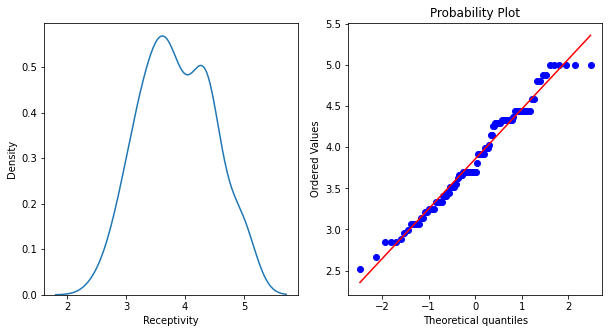

ShapiroResult(statistic=0.9737365245819092, pvalue=0.03644062578678131)

In [ ]:
normality(Spray)

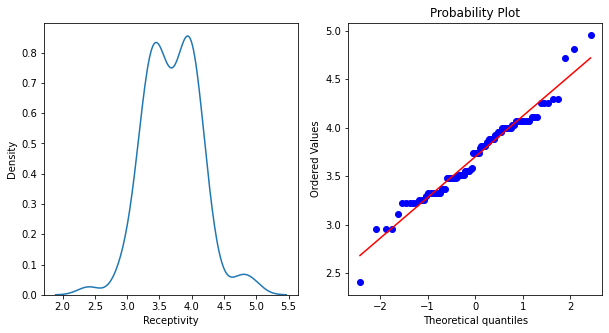

ShapiroResult(statistic=0.9701603651046753, pvalue=0.03629191964864731)

In [ ]:
normality(No_Spray)


In [ ]:
# we will need to perform box-cox transformation, because the distributions are not normally distributed
# applying the box cox transformation and re-test normality

No_Spray_transf, NSbest_lambda = stats.boxcox(No_Spray)

Spray_transf, Sbest_lambda = stats.boxcox(Spray)

# test of normality
display(shapiro(No_Spray_transf))

display(shapiro(Spray_transf))

display(NSbest_lambda)
display(Sbest_lambda)

# As the transformed value of cute-direct shapiro test is 0.06, which is more than the threshold, we fail to reject the null hypothesis
# So the data becomes normally distributed after box-cox transformation

ShapiroResult(statistic=0.9710262417793274, pvalue=0.04177143797278404)

ShapiroResult(statistic=0.9755043387413025, pvalue=0.050641827285289764)

0.6989910041237654

0.6475674701012547

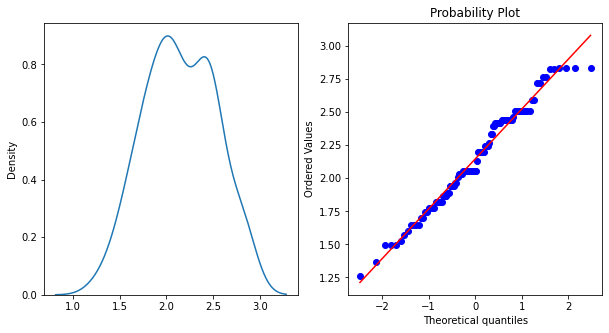

ShapiroResult(statistic=0.9755043387413025, pvalue=0.050641827285289764)

In [ ]:
normality(Spray_transf)

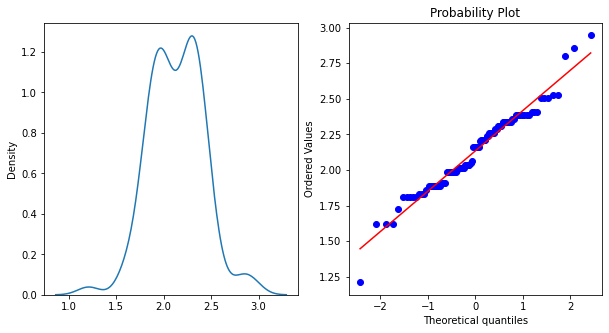

ShapiroResult(statistic=0.9710262417793274, pvalue=0.04177143797278404)

In [ ]:
normality(No_Spray_transf)

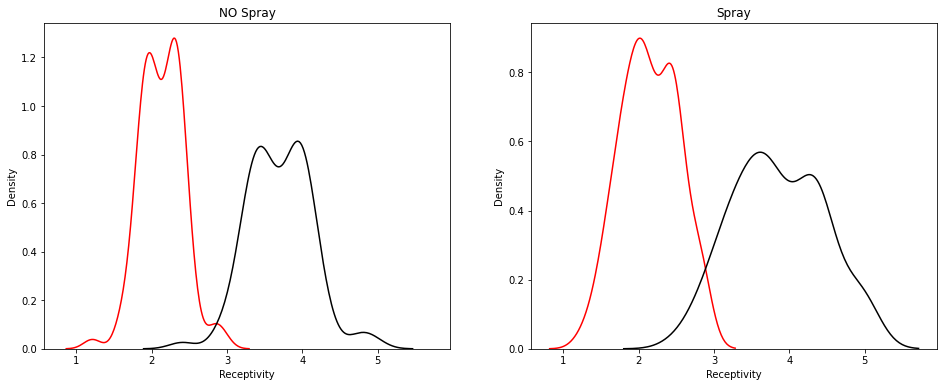

In [ ]:
#plot the distribution of the transformed data values, compared to original

fig, axs = plt.subplots(1,2, figsize= (16,6), sharex=True)

sns.kdeplot(No_Spray_transf, ax=axs[0], color='r')
sns.kdeplot(No_Spray, ax=axs[0], color='black')
axs[0].set_title('NO Spray')

sns.kdeplot(Spray_transf, ax=axs[1], color='r')
sns.kdeplot(Spray, ax=axs[1], color= 'black')
axs[1].set_title('Spray')

plt.show()

####Is there homogeneity or heterogeneity of variance?

In [ ]:
# Performing Levene's test for homogeneity of variance between one group (Spray) against the other group (NO Spray)

stats.levene(No_Spray_transf, Spray_transf, center='median')

# Since the P-value of levene's test is 0.004, which is less than the threshold, we reject the null hipothesys,
# so we have sufficient evidence to say that the variance in receptivity between Spray vs No Spray participants is significantly different

# There is heterogeneity of variance

LeveneResult(statistic=8.409116810903399, pvalue=0.004168666113378237)

In [ ]:
# Performing Levene's test for homogeneity of variance between one group (Spray) against the other group (NO Spray)

stats.levene(Spray_transf, No_Spray_transf, center='mean')

# Since the P-value of levene's test is 0.001, which is less than the threshold, we reject the null hipothesys,
# so we have sufficient evidence to say that the variance in receptivity between Spray vs No Spray participants is significantly different

# There is heterogeneity of variance

LeveneResult(statistic=9.99860008274336, pvalue=0.0018210364267608671)

####What is the mean score of receptivity in the experimental condition?

In [ ]:
print(f'The mean score of receptivity in participants in the experimental condition (using the spray) is:{Spray.mean()}')

print(f'The STD of receptivity in participants in the experimental condition (using the spray) is:{Spray.std()}')

print(f'The VAR of receptivity in participants in the experimental condition (using the spray) is:{Spray.var()}')

The mean score of receptivity in participants in the experimental condition (using the spray) is:3.8568834615384615
The STD of receptivity in participants in the experimental condition (using the spray) is:0.6030889065659
The VAR of receptivity in participants in the experimental condition (using the spray) is:0.3637162292228528


####What is the mean score of receptivity in the control condition?

In [ ]:
print(f'The mean score of receptivity in participants in the control condition (not using the spray) is:{No_Spray.mean()}')

print(f'The STD of receptivity in participants in the control condition (not using the spray) is:{No_Spray.std()}')

print(f'The VAR of receptivity in participants in the control condition (not using the spray) is:{No_Spray.var()}')

The mean score of receptivity in participants in the control condition (not using the spray) is:3.6991735555555545
The STD of receptivity in participants in the control condition (not using the spray) is:0.4205631456690911
The VAR of receptivity in participants in the control condition (not using the spray) is:0.17687335949508115


####What is your answer to RQ2? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.

In [ ]:
# We can perform a T-test to compare two groups

from statsmodels.stats.weightstats import ttest_ind

ttest_ind(Spray, No_Spray)


(2.0810018247893165, 0.03876045015663044, 192.0)

In [ ]:
# Performing ANOVA test to analyze differences between these two groups of the experiment

# H0 - Null Hypothesis - There is no difference between group's means
# Ha - Alternative Hypothesis - There is at least one substancial difference between group's means

f_oneway(Spray, No_Spray)

# A one-way ANOVA was conducted to analyze if there was a difference on the receptivity of womem wich was aborded by guys
# using a feromone spray compared to girls aborded by guys who does not use the feromone spray.
# and there was heterogeneity of variances, as assessed by Levene's test of homogeneity of variances (p = 0.00009).

# Pickup receptivity score was statistically significantly different between  groups, F(1, 194) = 4.33, p < 0.05.
# So we can conclude that there is at least one sample group's mean that was different from the others.

# Receptivity of pickup mean when mens are using the spray was 3.85 and STD was 0.60, besides without spray pickup mean was 3.69 and STD was 0.42.

F_onewayResult(statistic=4.330568594776483, pvalue=0.03876045015662963)

In [ ]:
#from scipy.stats import kruskal

K_stat, p = kruskal(Spray, No_Spray)

print(K_stat, p)
if p > 0.05:
  print('Same distribution (fail to reject H0)')
else:
  print('Different distribution (reject H0)')

3.435700882886162 0.06380150864629414
Same distribution (fail to reject H0)


###RQ3: Is there any evidence to suggest that the impact of the androstadienone spray on attractiveness effect will be enhanced by the pick-up approach?

####What is your dependent variable?

In [ ]:
# The dependent variable is the receptivity value

####What is(are) your independent variable(s)?

In [ ]:
# This time we got two dependent variable: Scent and PickUp approach, both are dicothomous variables

####Is there independence of observations?

In [ ]:
# Yes, there is independence of observations because one of the independent factors does not interfere with the other.
# The independent factors does not interfere with each other, only with the dependent factor

####Are there any significant outliers?

In [ ]:
# Four combinations to analyze

CD_scent = df[(df['Scent'] == 1) & (df['PickUp'] == 1)]['Receptivity']

CD_NOscent = df[(df['Scent'] == 0) & (df['PickUp'] == 1)]['Receptivity']

DD_scent = df[(df['Scent'] == 1) & (df['PickUp'] == 0)]['Receptivity']

DD_NOscent = df[(df['Scent'] == 0) & (df['PickUp'] == 0)]['Receptivity']


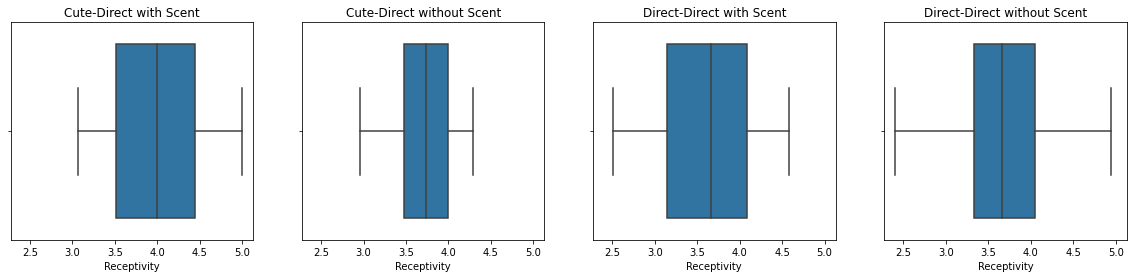

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,4), sharex='row')
sns.boxplot(x= CD_scent, ax=ax1)
sns.boxplot(x= CD_NOscent, ax=ax2)
sns.boxplot(x= DD_scent, ax=ax3)
sns.boxplot(x= DD_NOscent, ax=ax4)
ax1.set_title('Cute-Direct with Scent')
ax2.set_title('Cute-Direct without Scent')
ax3.set_title('Direct-Direct with Scent')
ax4.set_title('Direct-Direct without Scent')
plt.show()

####How is your dependent variable distributed in each cell?

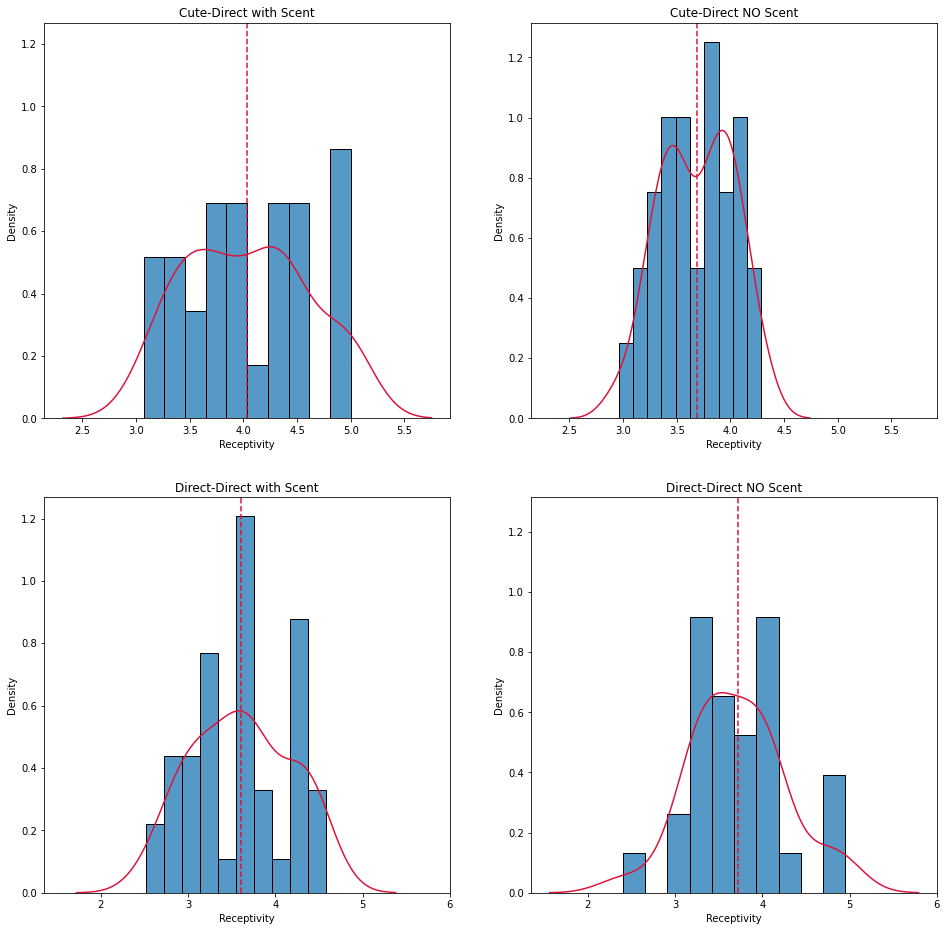

In [ ]:
#Comparing distribution in receptivity values between different groups, with and without feromone spray, cute-direct or direct-direct pickup

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,16), sharex='row', sharey='col')

sns.histplot(CD_scent, kde= False, stat= 'density', bins= 10, ax= ax1)
sns.kdeplot(CD_scent, ax= ax1, color= 'crimson')
ax1.axvline(CD_scent.mean(), ls='--', color='crimson')
ax1.set_title('Cute-Direct with Scent')

sns.histplot(CD_NOscent, kde= False, stat= 'density', bins= 10, ax= ax2)
sns.kdeplot(CD_NOscent, ax= ax2, color= 'crimson')
ax2.axvline(CD_NOscent.mean(), ls='--', color='crimson')
ax2.get_xticklabels(ax1)
ax2.set_title('Cute-Direct NO Scent')

sns.histplot(DD_scent, kde= False, stat= 'density', bins= 10, ax= ax3)
sns.kdeplot(DD_scent, ax= ax3, color= 'crimson')
ax3.axvline(DD_scent.mean(), ls='--', color='crimson')
ax3.set_title('Direct-Direct with Scent')

sns.histplot(DD_NOscent, kde= False, stat= 'density', bins= 10, ax= ax4)
sns.kdeplot(DD_NOscent, ax= ax4, color= 'crimson')
ax4.axvline(DD_NOscent.mean(), ls='--', color='crimson')
ax4.set_title('Direct-Direct NO Scent')

plt.show()

####Do you need to perform any transformations?

In [ ]:
# Test normality of each distribution

print(f'Cute-Direct with Scent {shapiro(CD_scent)}')
print(f'Cute-Direct NO Scent {shapiro(CD_NOscent)}')
print(f'Direct-Direct with Scent {shapiro(DD_scent)}')
print(f'Direct-Direct NO Scent {shapiro(DD_NOscent)}')

# only one of the values of Shapiro-Wilk test (CD_sent = 0.01) is less than 0.05, and can be considered as non normal distribution and can be transformed to fit a normal distribution
# The rest were considered normal (p-value > 0.05)

Cute-Direct with Scent ShapiroResult(statistic=0.9471511840820312, pvalue=0.01146571896970272)
Cute-Direct NO Scent ShapiroResult(statistic=0.9623874425888062, pvalue=0.06159663200378418)
Direct-Direct with Scent ShapiroResult(statistic=0.9590379595756531, pvalue=0.11979644000530243)
Direct-Direct NO Scent ShapiroResult(statistic=0.965967059135437, pvalue=0.43547606468200684)


ShapiroResult(statistic=0.9515278339385986, pvalue=0.018387820571660995)

ShapiroResult(statistic=0.9629483819007874, pvalue=0.06563398241996765)

ShapiroResult(statistic=0.9602455496788025, pvalue=0.13292494416236877)

ShapiroResult(statistic=0.9682294130325317, pvalue=0.491936057806015)

0.18625308627906184

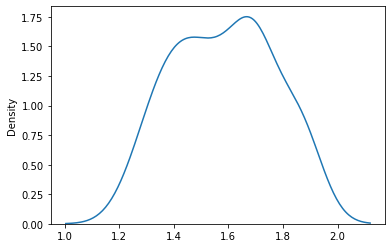

In [ ]:
# Apllying box cox transformation in the first distribution, re testing and re ploting

from scipy.stats import boxcox

CD_scent_transf, CD_scent_lambda = stats.boxcox(CD_scent)
CD_NOscent_transf, CD_NOscent_lambda = stats.boxcox(CD_NOscent)
DD_scent_transf, DD_scent_lambda = stats.boxcox(DD_scent)
DD_NOscent_transf, DD_NOscent_lambda = stats.boxcox(DD_NOscent)


#plot the distribution of the transformed data values
sns.kdeplot(CD_scent_transf)

# test of normality
display(shapiro(CD_scent_transf))
display(shapiro(CD_NOscent_transf))

display(shapiro(DD_scent_transf))
display(shapiro(DD_NOscent_transf))

display(CD_scent_lambda)

# As the transformed value of cute-direct shapiro test is 0.06, which is more than the threshold, we fail to reject the null hypothesis
# So the data becomes normally distributed after box-cox transformation


####Is there homogeneity or heterogeneity of variance?

In [ ]:
# Performing Levene's test for homogeneity of variance between one group (Spray) against the other group (NO Spray)

stats.levene(CD_scent_transf, CD_NOscent_transf, DD_scent_transf, DD_NOscent_transf, center='mean')
#stats.levene(CD_scent_transf, CD_NOscent_transf, DD_scent_transf, DD_NOscent_transf, center='median')

# Since the P-value of levene's test is <0.001, which is less than the threshold, we reject the null hipothesys,
# so we have sufficient evidence to say that at least one pair of groups has significantly different variance in Receptivity

# There is heterogeneity of variance

LeveneResult(statistic=38.378830737987904, pvalue=1.9485813937661495e-19)

In [ ]:
print(CD_scent.mean(), CD_NOscent.mean(), DD_scent.mean(), DD_NOscent.mean())

print(CD_scent.std(), CD_NOscent.std(), DD_scent.std(), DD_NOscent.std())

4.037496666666667 3.689371333333334 3.6105927272727283 3.7187780000000004
0.5696362115723186 0.3402491541202535 0.5642830990976717 0.5537967456187614


In [ ]:
print(CD_scent.var(), CD_NOscent.var(), DD_scent.var(), DD_NOscent.var())

0.32448541353446325 0.11576948687954804 0.31841541592727274 0.3066908354579311


####Is there any interaction between the two factors?

In [ ]:
K_stats, p = kruskal(CD_scent, CD_NOscent, DD_scent, DD_NOscent)

print(K_stat, p)
if p > 0.05:
  print('Same distribution (fail to reject H0)')
else:
  print('Different distribution (reject H0)')

3.435700882886162 0.001075086747386284
Different distribution (reject H0)


In [ ]:
# performing post hoc test Dunn
!pip install scikit-posthocs
import scikit_posthocs as sp


In [ ]:
pValues= sp.posthoc_dunn([CD_scent, CD_NOscent, DD_scent, DD_NOscent], p_adjust= 'bonferroni')

print(pValues)

          1         2         3         4
1  1.000000  0.009983  0.002236  0.084636
2  0.009983  1.000000  1.000000  1.000000
3  0.002236  1.000000  1.000000  1.000000
4  0.084636  1.000000  1.000000  1.000000


In [ ]:
pValues > 0.05

,1,2,3,4
1,True,False,False,True
2,False,True,True,True
3,False,True,True,True
4,True,True,True,True


In [ ]:
# Performing a multifactorial ANOVA

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Receptivity ~ C(PickUp) + C(Scent) + C(PickUp) : C(Scent)', data= df).fit()
anova_table = sm.stats.anova_lm(model, typ= 2)

anova_table

,sum_sq,df,F,PR(>F)
C(PickUp),2.314331,1.0,9.055073,0.002975
C(Scent),1.515279,1.0,5.928695,0.015820
C(PickUp):C(Scent),2.329234,1.0,9.113383,0.002886
Residual,48.560936,190.0,NaN,NaN


####What is your answer to RQ3? Report on the findings (no less than 200 words). Don’t forget to mention the assumptions. You can use η2 instead of ω2.

###Answer the main research question by taking the above findings into account (no less than 200 words). Don’t forget to mention the assumptions.

In [ ]:
h0 = 3.65
h1 = 3.86

print(h1/h0)

1.0575342465753426
